<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/DL_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'black'
file = 'black/urls_black.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'teddys'
file = 'teddys/urls_teddys.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'grizzly'
file = 'grizzly/urls_grizzly.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [69]:
path.ls()

[PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/cleaned.csv')]

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [73]:
data.classes

['black', 'grizzly', 'teddys']

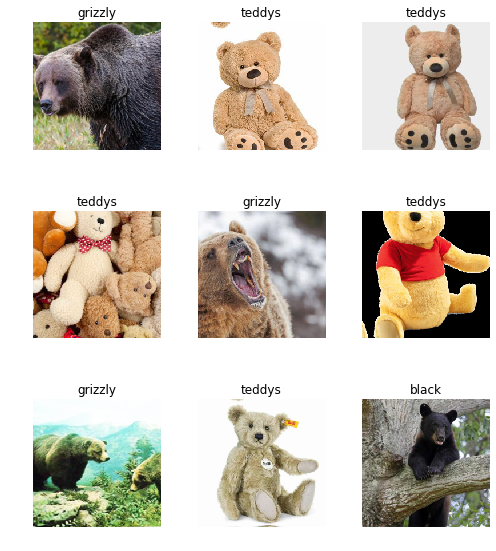

In [74]:
data.show_batch(rows=3, figsize=(7,8))

In [75]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 444, 110)

Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [77]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.137618,0.166002,0.027273,02:25
1,0.607421,0.099622,0.027273,02:24
2,0.413968,0.116279,0.027273,02:26
3,0.334933,0.118596,0.027273,02:23


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [80]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


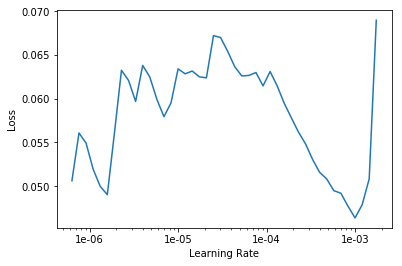

In [81]:
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.090742,0.124189,0.027273,03:18
1,0.075402,0.128252,0.027273,03:13


In [0]:
learn.save('stage-2')

Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

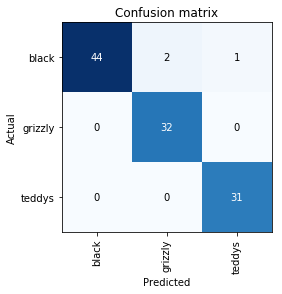

In [86]:
interp.plot_confusion_matrix()

Cleaning Up

In [0]:
from fastai.widgets import *

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [92]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)

Putting your model in production

In [0]:
learn.export()

In [95]:
data.classes

['black', 'grizzly', 'teddys']

In [0]:
defaults.device = torch.device('cpu')

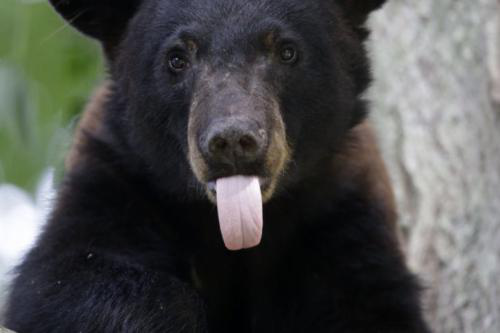

In [97]:
img = open_image(path/'black'/'00000021.jpg')
img

In [101]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(


In [0]:
learn = load_learner(path)

In [104]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black